In [2]:

# 📘 EMPLOYEE ATTRITION PREDICTOR (Simplified)
# Ensemble ML with GradientBoosting, XGBoost & Stacking
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset path
data_path = '/content/drive/MyDrive/datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv'



# -------------------------------
# 1️⃣ Load Data
# -------------------------------
df = pd.read_csv(data_path)
# Show all columns
pd.set_option('display.max_columns', None)

# Now run
display(df.head())
display(df.info())
# -------------------------------
# 1️⃣ Encode Target
# -------------------------------
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# -------------------------------
# 2️⃣ Drop unnecessary columns
# -------------------------------
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=drop_cols, errors='ignore')

# -------------------------------
# 3️⃣ Handle Binary categorical
# -------------------------------
if df['OverTime'].dtype == 'object':
    df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# -------------------------------
# 4️⃣ Encode Remaining Categorical
# -------------------------------
cat_cols = df.select_dtypes(include='object').columns
print("Categorical columns:", cat_cols.tolist())

# Use LabelEncoder for simplicity
le = LabelEncoder()
for c in cat_cols:
    df[c] = le.fit_transform(df[c])

# -------------------------------
# 6️⃣ Split features and target
# -------------------------------
X = df.drop(columns=['Attrition'])
y = df['Attrition']

# -------------------------------
# 7️⃣ Scale numeric features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 8️⃣ Handle imbalance (SMOTE)
# -------------------------------
print(y.value_counts())
# If imbalance exists (like ~80/20), apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("✅ After SMOTE:", y_res.value_counts(normalize=True))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

None

Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
Attrition
0    1233
1     237
Name: count, dtype: int64
✅ After SMOTE: Attrition
1    0.5
0    0.5
Name: proportion, dtype: float64



📊 Dataset Shape: (1470, 31)

📋 Column Names:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

🕳️ Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel       

None

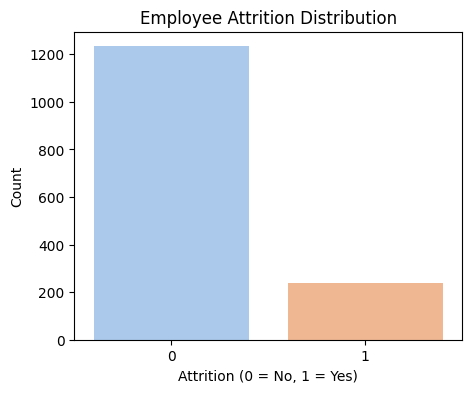

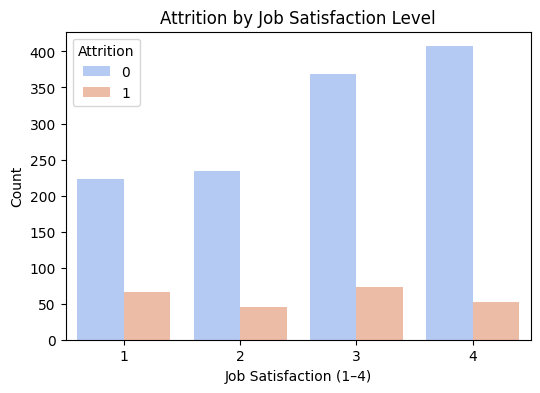

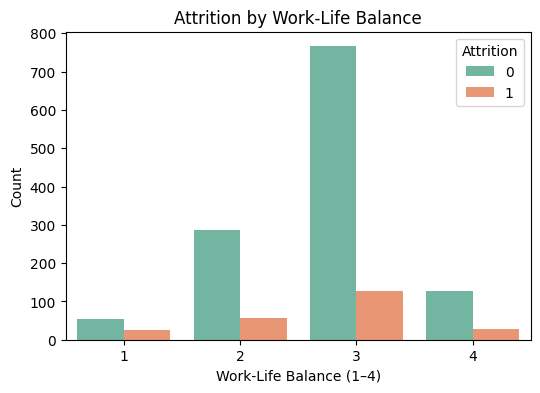

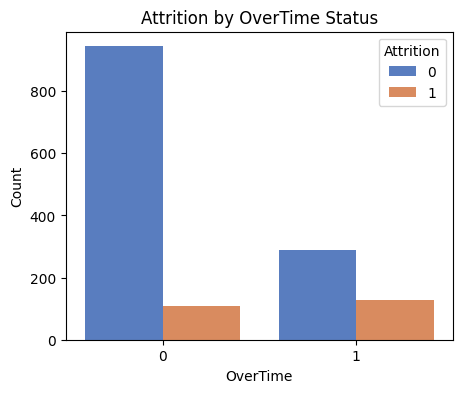

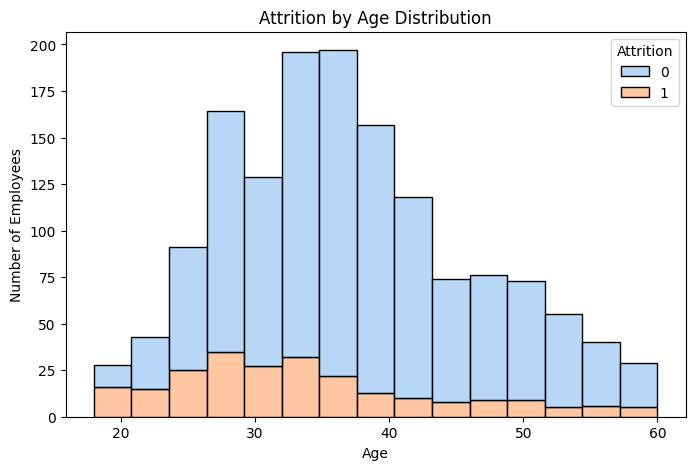

/tmp/ipython-input-3531268708.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')


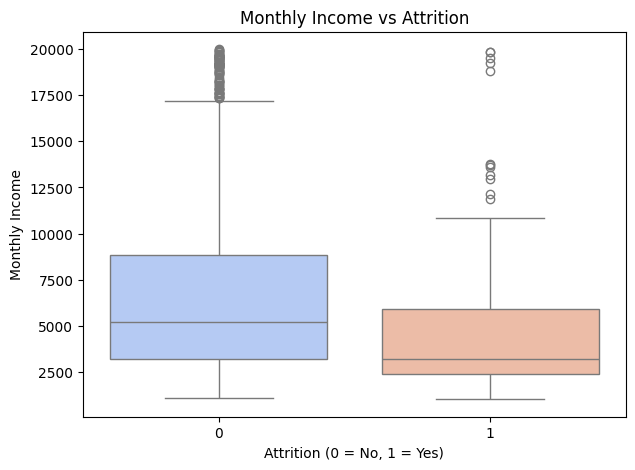

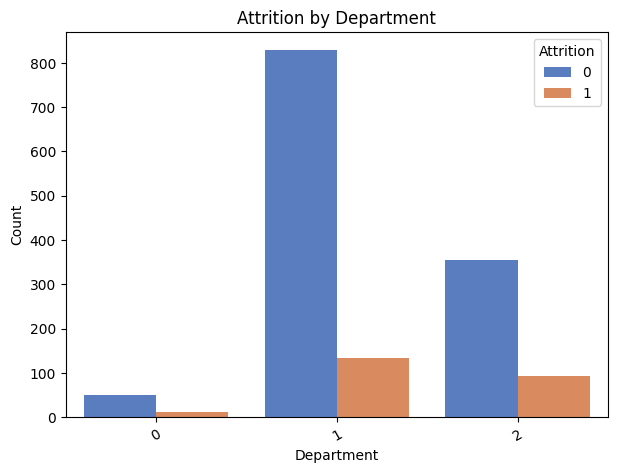

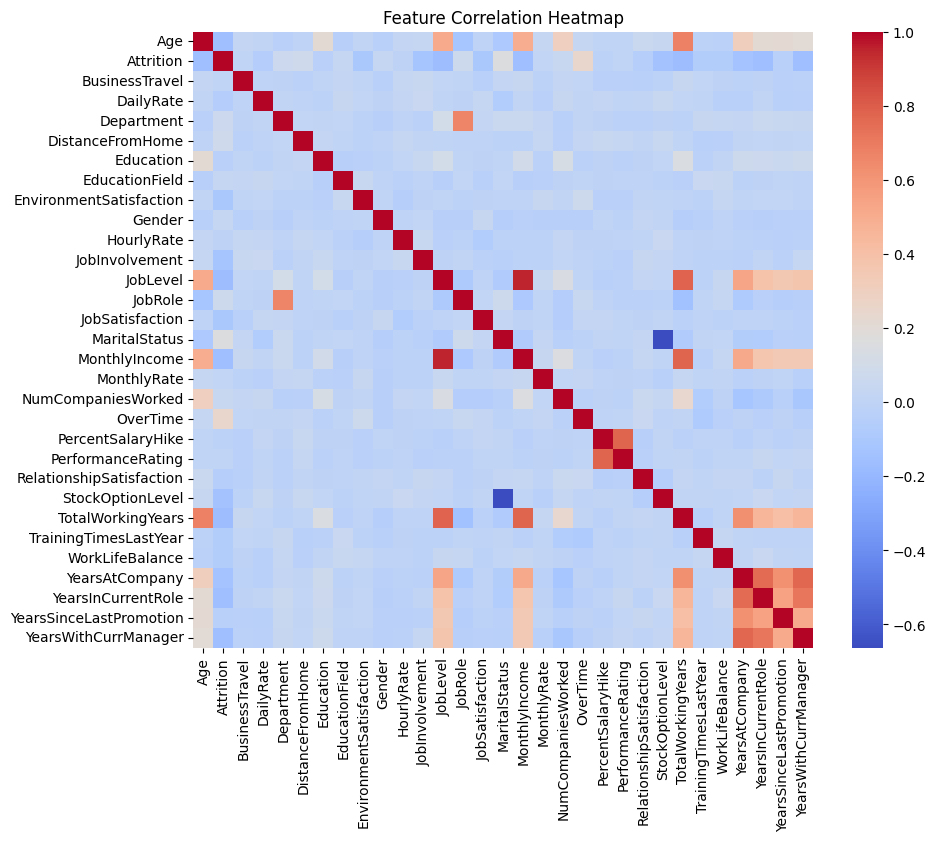

/tmp/ipython-input-3531268708.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


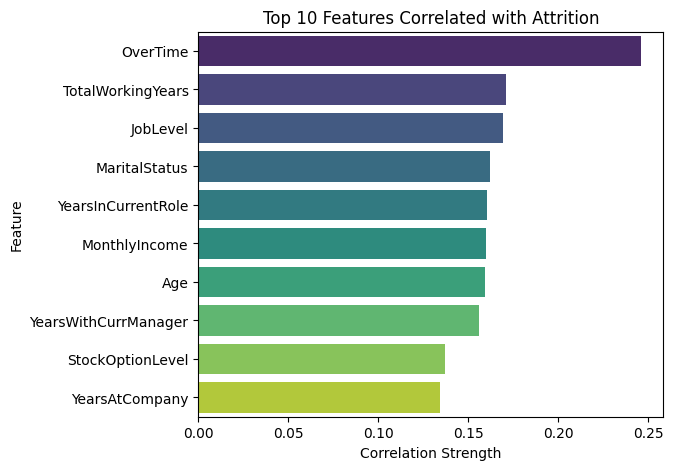


✅ EDA Completed Successfully!


In [4]:
# ======================================
# 🔍 Exploratory Data Analysis (EDA)
# ======================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Basic Information ---
print("\n📊 Dataset Shape:", df.shape)
print("\n📋 Column Names:\n", df.columns.tolist())
print("\n🕳️ Missing Values:\n", df.isnull().sum().sort_values(ascending=False))
print("\n📈 Data Types:\n")
display(df.info())

# ======================================
# 🎯 Target Variable Distribution
# ======================================
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=df, hue='Attrition', palette='pastel', legend=False)
plt.title('Employee Attrition Distribution')
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# ======================================
# 😊 Attrition by Job Satisfaction
# ======================================
plt.figure(figsize=(6,4))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='coolwarm')
plt.title('Attrition by Job Satisfaction Level')
plt.xlabel("Job Satisfaction (1–4)")
plt.ylabel("Count")
plt.show()

# ======================================
# ⚖️ Attrition by Work-Life Balance
# ======================================
plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by Work-Life Balance')
plt.xlabel("Work-Life Balance (1–4)")
plt.ylabel("Count")
plt.show()

# ======================================
# ⏰ OverTime vs Attrition
# ======================================
plt.figure(figsize=(5,4))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='muted')
plt.title('Attrition by OverTime Status')
plt.xlabel("OverTime")
plt.ylabel("Count")
plt.show()

# ======================================
# 👶 Age Distribution by Attrition
# ======================================
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=15, palette='pastel')
plt.title('Attrition by Age Distribution')
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

# ======================================
# 💰 Monthly Income vs Attrition
# ======================================
plt.figure(figsize=(7,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette='coolwarm')
plt.title('Monthly Income vs Attrition')
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Monthly Income")
plt.show()

# ======================================
# 🏢 Department-wise Attrition
# ======================================
if 'Department' in df.columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x='Department', hue='Attrition', data=df, palette='muted')
    plt.title('Attrition by Department')
    plt.xticks(rotation=30)
    plt.xlabel("Department")
    plt.ylabel("Count")
    plt.show()

# ======================================
# 🔥 Correlation Heatmap
# ======================================
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# ======================================
# 🧠 Top 10 Features Correlated with Attrition
# ======================================
corr = df.corr(numeric_only=True)
top_corr = corr['Attrition'].abs().sort_values(ascending=False)[1:11]

plt.figure(figsize=(6,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 10 Features Correlated with Attrition')
plt.xlabel("Correlation Strength")
plt.ylabel("Feature")
plt.show()

print("\n✅ EDA Completed Successfully!")


In [ ]:

# -------------------------------
# 1️⃣ Feature Selection
# -------------------------------
selected_features = [
    'OverTime',
    'TotalWorkingYears',
    'JobLevel',
    'YearsAtCompany',
    'MonthlyIncome',
    'Age',
    'MaritalStatus',
    'YearsWithCurrManager',
    'YearsInCurrentRole',
    'JobSatisfaction',
    'WorkLifeBalance'
]

X = df[selected_features]
y = df['Attrition']


# -------------------------------
# 3️⃣ Train-Test Split & Scaling
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 4️⃣ Define Models
# -------------------------------
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

base_learners = [
    ('rf', RandomForestClassifier(n_estimators=150, max_depth=8, random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf', C=2, gamma='scale', random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
]
meta_learner = XGBClassifier(eval_metric='logloss', learning_rate=0.05, n_estimators=200, random_state=42)

stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    n_jobs=-1
)

models = {
    "GradientBoosting": gb,
    "XGBoost": xgb,
    "Stacking": stack
}

# -------------------------------
# 5️⃣ Cross-Validation
# -------------------------------
print("\n🔹 Cross-Validation (5-Fold):")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    print(f"{name}: Mean F1={scores.mean():.3f}, Std={scores.std():.3f}")

# -------------------------------
# 6️⃣ Train and Evaluate
# -------------------------------
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred)
    }

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    results[name] = evaluate(model, X_test_scaled, y_test)

print("\n🔹 Evaluation Results:")
print(pd.DataFrame(results).T)

# # -------------------------------
# # 7️⃣ Save Best Model & Scaler
# # -------------------------------
# joblib.dump(stack, '/content/drive/MyDrive/employee_attrition_model.pkl')
# joblib.dump(scaler, '/content/drive/MyDrive/employee_attrition_scaler.pkl')
# print("✅ Model and scaler saved to Drive successfully!")



🔹 Cross-Validation (5-Fold):
GradientBoosting: Mean F1=0.920, Std=0.016
XGBoost: Mean F1=0.923, Std=0.011
Stacking: Mean F1=0.951, Std=0.012

🔹 Evaluation Results:
                  Accuracy  Precision    Recall        F1   ROC-AUC
GradientBoosting  0.921053   0.948276  0.890688  0.918580  0.921053
XGBoost           0.937247   0.969565  0.902834  0.935010  0.937247
Stacking          0.947368   0.947368  0.947368  0.947368  0.947368


In [ ]:
from sklearn.pipeline import Pipeline
import joblib
from google.colab import drive

# -------------------------------
# Mount Google Drive
# -------------------------------
drive.mount('/content/drive')

# -------------------------------
# Combine scaler + trained model into pipeline
# -------------------------------
final_pipeline = Pipeline([
    ('scaler', scaler),
    ('model', stack)  # trained on selected features
])

# -------------------------------
# Save to Google Drive
# -------------------------------
save_path = '/content/drive/MyDrive/employee_attrition_pipeline_11feat.pkl'
joblib.dump(final_pipeline, save_path)

print(f"✅ Pipeline saved successfully at: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Pipeline saved successfully at: /content/drive/MyDrive/employee_attrition_pipeline.pkl
